<a href="https://colab.research.google.com/github/modhudeb/House-price-prediction/blob/main/HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('housePred.csv', index_col='Id')
df = data.copy()

In [ ]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
def checkNull(df : pd.DataFrame) :
  temp = df.isnull().sum()
  nullList = temp[temp>0].sort_values(ascending = False)
  for i in nullList.index :
    print(f" {nullList[i]}      {i}          {df[i].dtype}")

In [ ]:
# # printing only null containing columns and total num
# xx = df.isnull().sum()
# for ind in xx.index :
#   if xx[ind] != 0:
#     print(f"{xx[ind]}      {ind}")

In [ ]:
checkNull(df)

 1453      PoolQC          object
 1406      MiscFeature          object
 1369      Alley          object
 1179      Fence          object
 690      FireplaceQu          object
 259      LotFrontage          float64
 81      GarageType          object
 81      GarageYrBlt          float64
 81      GarageFinish          object
 81      GarageQual          object
 81      GarageCond          object
 38      BsmtExposure          object
 38      BsmtFinType2          object
 37      BsmtFinType1          object
 37      BsmtCond          object
 37      BsmtQual          object
 8      MasVnrArea          float64
 8      MasVnrType          object
 1      Electrical          object


**Removing high null containing columns**

In [ ]:
df.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)

## Treating missing values

In [ ]:
checkNull(df)

 259      LotFrontage          float64
 81      GarageType          object
 81      GarageYrBlt          float64
 81      GarageFinish          object
 81      GarageQual          object
 81      GarageCond          object
 38      BsmtExposure          object
 38      BsmtFinType2          object
 37      BsmtQual          object
 37      BsmtCond          object
 37      BsmtFinType1          object
 8      MasVnrType          object
 8      MasVnrArea          float64
 1      Electrical          object


#### custom functons

In [ ]:
# custom function to plot continuous value
def plotHist(colm, title : str = "") :
  plt.figure(figsize=(15,8))
  sns.histplot(colm, kde = True)
  plt.title(title)
  plt.show()

In [ ]:
# custom function to plot Categorical value
def plotCount(colm, title : str = "") :
  plt.figure(figsize=(15,8))
  sns.countplot(colm)
  plt.title(title)
  plt.show()

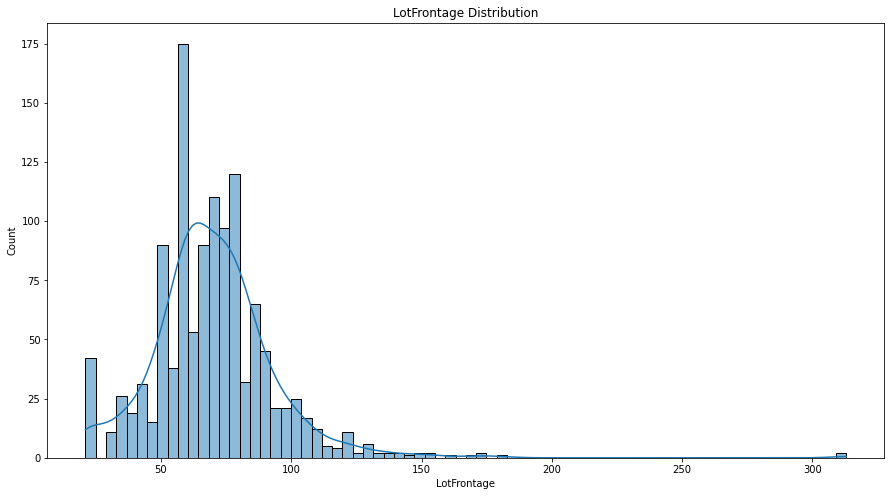

In [ ]:
# LotFrontage
plotHist(df['LotFrontage'], "LotFrontage Distribution")

In [ ]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

This data is distributed in chi-squared ( or normal distribution) form. So we can use mean or close to mean to fill null values

In [ ]:
df.LotFrontage.fillna(65, limit = 100, inplace = True)
df.LotFrontage.fillna(70, limit = 100, inplace = True)
df.LotFrontage.fillna(75, limit = 59, inplace = True)

In [ ]:
# GarageType
df.GarageType.describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


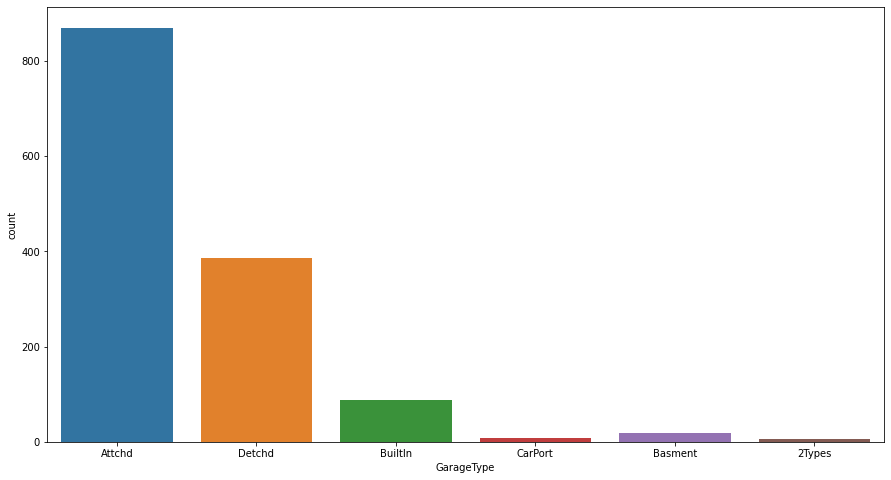

In [ ]:
plotCount(df.GarageType)

In [ ]:
df.GarageType.fillna("Attchd", inplace = True)

In [ ]:
checkNull(df)

 81      GarageYrBlt          float64
 81      GarageFinish          object
 81      GarageQual          object
 81      GarageCond          object
 38      BsmtExposure          object
 38      BsmtFinType2          object
 37      BsmtQual          object
 37      BsmtCond          object
 37      BsmtFinType1          object
 8      MasVnrType          object
 8      MasVnrArea          float64
 1      Electrical          object


In [ ]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

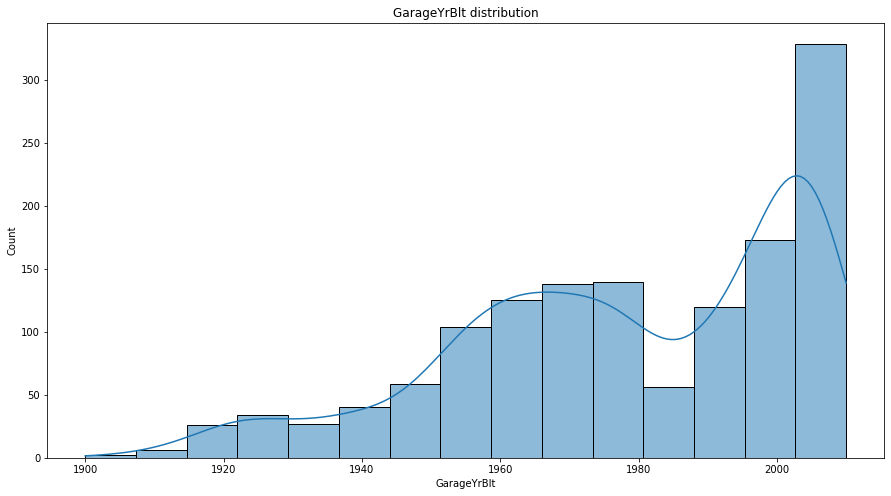

In [ ]:
plotHist(df.GarageYrBlt, title = "GarageYrBlt distribution")

The distribution is not right for filling null by mean

In [ ]:
df.corr()['GarageYrBlt'].sort_values(ascending = False).head()

GarageYrBlt     1.000000
YearBuilt       0.825667
YearRemodAdd    0.642277
GarageCars      0.588920
GarageArea      0.564567
Name: GarageYrBlt, dtype: float64

'GarageYrBlt' column is very strongly correlated with 'YearBuilt'. SO let's see how these are occured

In [ ]:
df[['GarageYrBlt', 'YearBuilt']].head(5)

,GarageYrBlt,YearBuilt
Id,,
1,2003.0,2003
2,1976.0,1976
3,2001.0,2001
4,1998.0,1915
5,2000.0,2000


In [ ]:
df[['GarageYrBlt', 'YearBuilt']].tail(5)

,GarageYrBlt,YearBuilt
Id,,
1456,1999.0,1999
1457,1978.0,1978
1458,1941.0,1941
1459,1950.0,1950
1460,1965.0,1965


We can see both columns are totally same. We can drop one that has very less null value

In [ ]:
df.YearBuilt.isnull().sum()

0

So, we can remove GarageYrBlt column

In [ ]:
df.drop(columns = ['GarageYrBlt'], inplace = True)

In [ ]:
checkNull(df)

 81      GarageFinish          object
 81      GarageQual          object
 81      GarageCond          object
 38      BsmtExposure          object
 38      BsmtFinType2          object
 37      BsmtQual          object
 37      BsmtCond          object
 37      BsmtFinType1          object
 8      MasVnrType          object
 8      MasVnrArea          float64
 1      Electrical          object


In [ ]:
# GarageFinish
df.GarageFinish.describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


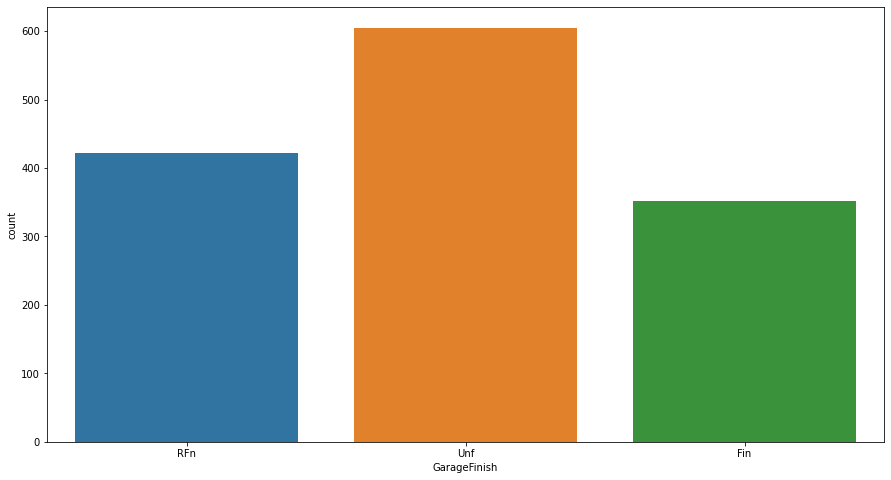

In [ ]:
plotCount(df.GarageFinish)

All value has decent high frequency. Front fill will be perfect fit

In [ ]:
df.GarageFinish.fillna(method = 'ffill', inplace = True)

In [ ]:
checkNull(df)

 81      GarageQual          object
 81      GarageCond          object
 38      BsmtExposure          object
 38      BsmtFinType2          object
 37      BsmtQual          object
 37      BsmtCond          object
 37      BsmtFinType1          object
 8      MasVnrType          object
 8      MasVnrArea          float64
 1      Electrical          object


In [ ]:
# GarageQual
df.GarageQual.describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [ ]:
df.GarageQual.fillna('TA', inplace = True)

In [ ]:
# GarageCond
df.GarageCond.describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [ ]:
df.GarageCond.fillna('TA', inplace = True)

In [ ]:
# BsmtExposure
df.BsmtExposure.describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


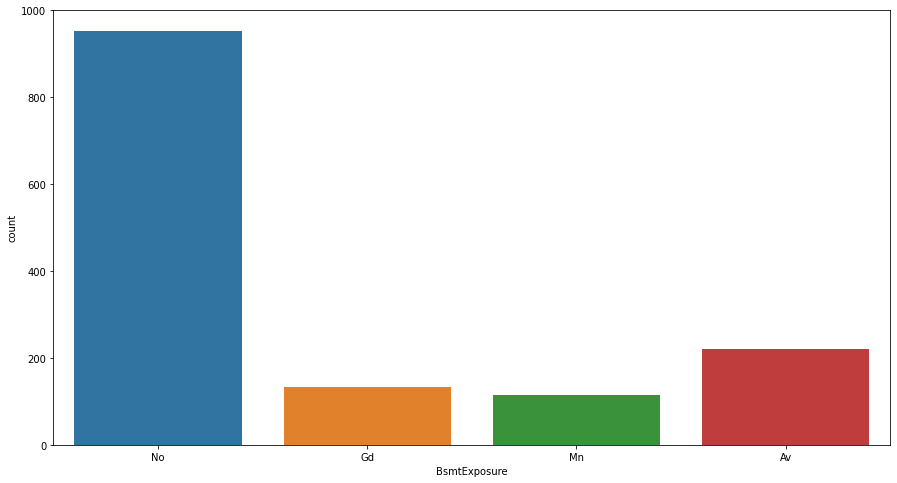

In [ ]:
plotCount(df.BsmtExposure)

In [ ]:
df.BsmtExposure.fillna('No', inplace = True)

In [ ]:
checkNull(df)

 38      BsmtFinType2          object
 37      BsmtQual          object
 37      BsmtCond          object
 37      BsmtFinType1          object
 8      MasVnrType          object
 8      MasVnrArea          float64
 1      Electrical          object


In [ ]:
# BsmtFinType2
df.BsmtFinType2.describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [ ]:
df.BsmtFinType2.fillna('Unf', inplace = True)

In [ ]:
# BsmtQual
df.BsmtQual.describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


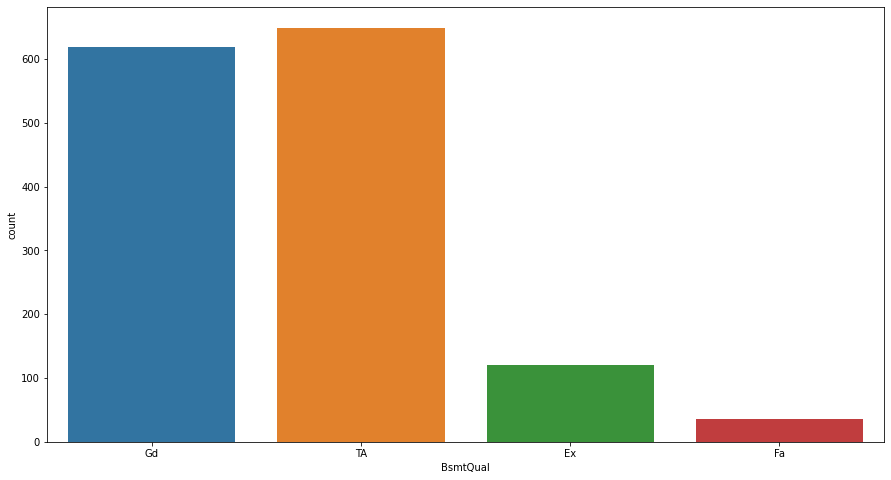

In [ ]:
plotCount(df.BsmtQual)

In [ ]:
df.BsmtQual.fillna('TA', limit = 20, inplace = True)
df.BsmtQual.fillna('Gd', limit = 17, inplace = True)

In [ ]:
# BsmtCond
df.BsmtCond.describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [ ]:
df.BsmtCond.fillna('TA', inplace = True)

In [ ]:
# BsmtFinType1
df.BsmtFinType1.describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


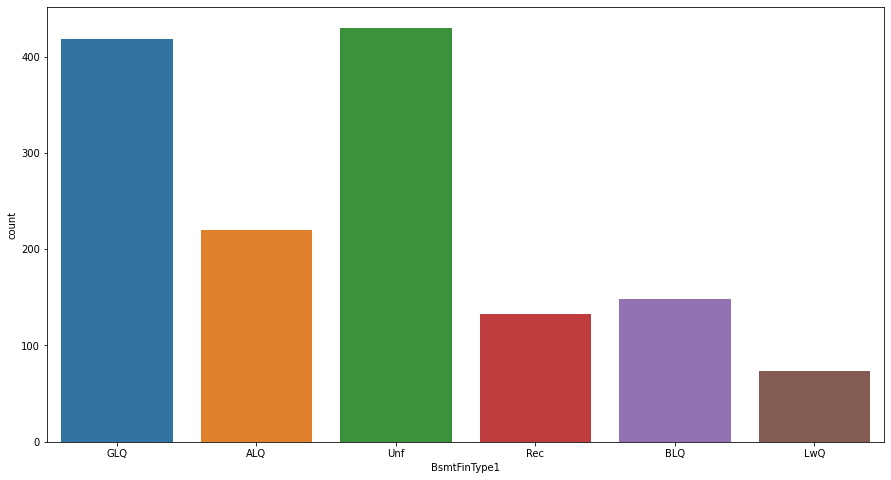

In [ ]:
plotCount(df.BsmtFinType1)

In [ ]:
df.BsmtFinType1.fillna(method='ffill', inplace = True)

In [ ]:
checkNull(df)

 8      MasVnrType          object
 8      MasVnrArea          float64
 1      Electrical          object


In [ ]:
# MasVnrType
df.MasVnrType.describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


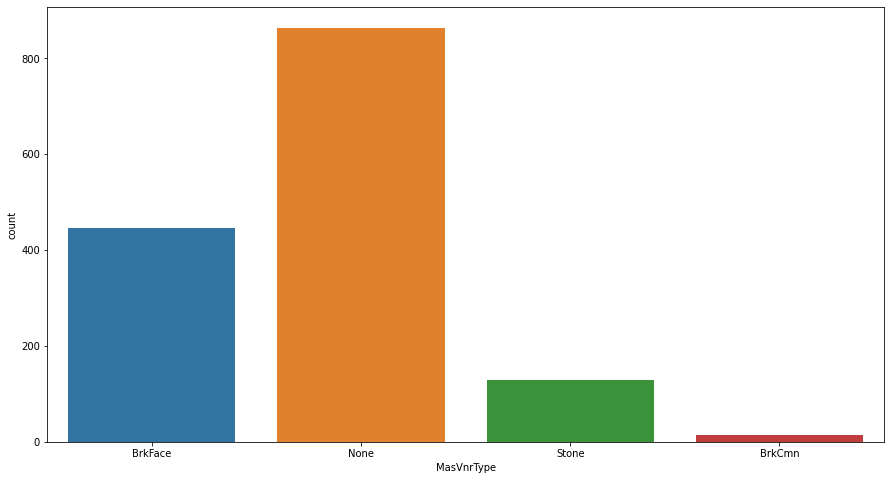

In [ ]:
plotCount(df.MasVnrType)

In [ ]:
df.MasVnrType.fillna('None', inplace = True)

In [ ]:
# MasVnrArea
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

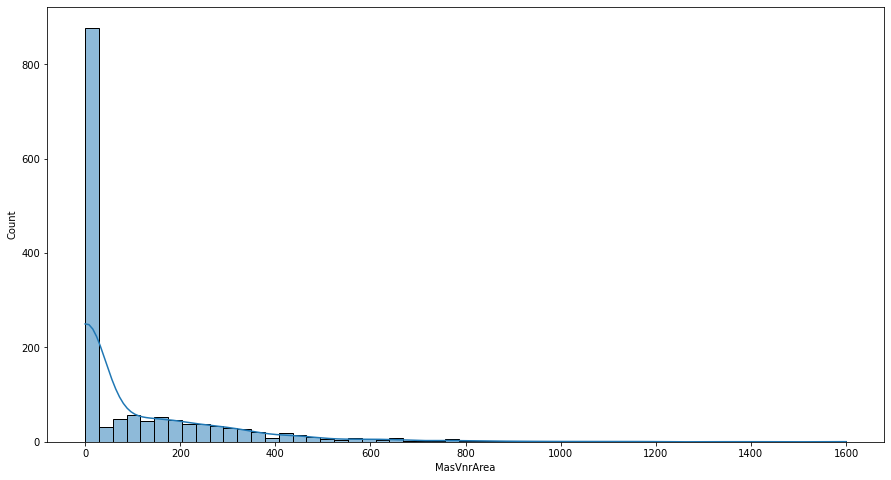

In [ ]:
plotHist(df.MasVnrArea)

In [ ]:
df.MasVnrArea.fillna(0, inplace = True)

In [ ]:
# Electrical
df.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [ ]:
df.Electrical.fillna('SBrkr', inplace = True)

## Converting object type data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
dfx = df.copy()

In [ ]:
encoder = LabelEncoder()
for ind in (dfx.select_dtypes('object').columns) :
  dfx[ind] = encoder.fit_transform(dfx[ind])

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Feature selection

In [ ]:
features = dfx.drop(columns=['SalePrice'])
target = dfx.SalePrice

In [ ]:
dfx.corr()['SalePrice'].sort_values(ascending = False).head(8)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64

### Method 1

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
scores = mutual_info_regression(features, target, n_neighbors=5, random_state=42)
scoreList = pd.DataFrame(scores, index = features.columns, columns=['Scorezz'])
scoreList.sort_values(by="Scorezz", ascending = False)

,Scorezz
OverallQual,0.565799
Neighborhood,0.520188
GrLivArea,0.474091
TotalBsmtSF,0.374097
GarageCars,0.370554
...,...
Heating,0.000000
PoolArea,0.000000
RoofMatl,0.000000
LowQualFinSF,0.000000


### Method 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfs = RandomForestRegressor(n_estimators = 400, min_samples_split=30, min_samples_leaf=20, max_depth=18)
rfs.fit(features, target)
scores = rfs.feature_importances_

In [ ]:
scoreList = pd.DataFrame(scores, index = features.columns, columns=['Scorezz'])
scoreList.sort_values(by="Scorezz", ascending = False)

,Scorezz
OverallQual,0.701829
GrLivArea,0.113999
TotalBsmtSF,0.044879
BsmtFinSF1,0.024686
GarageCars,0.020159
...,...
Condition2,0.000000
Functional,0.000000
BsmtFinType2,0.000000
RoofMatl,0.000000


## EDA

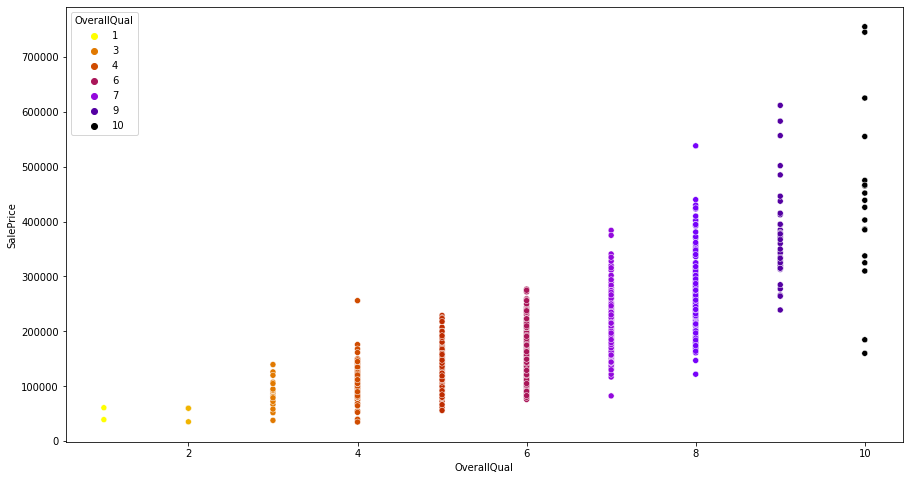

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=dfx.OverallQual, y = dfx.SalePrice, hue= dfx.OverallQual, palette='gnuplot_r')

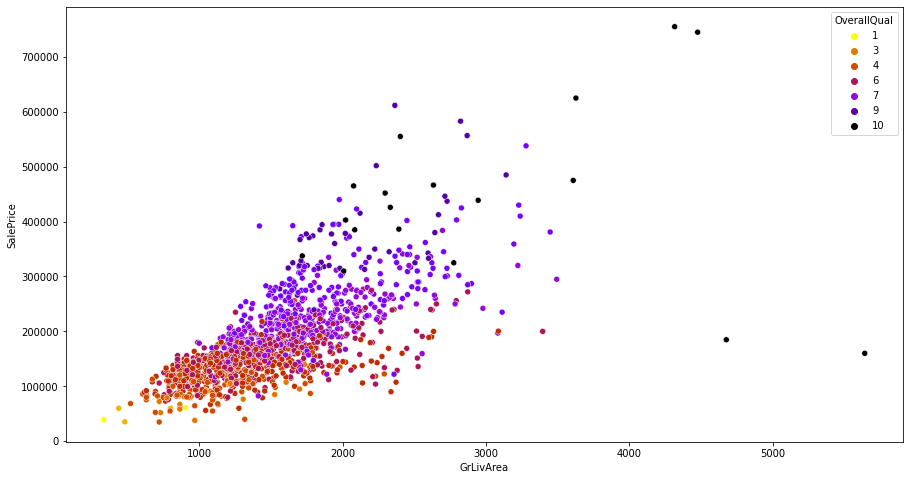

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=dfx['GrLivArea'], y = dfx['SalePrice'], hue = dfx.OverallQual, palette='gnuplot_r')

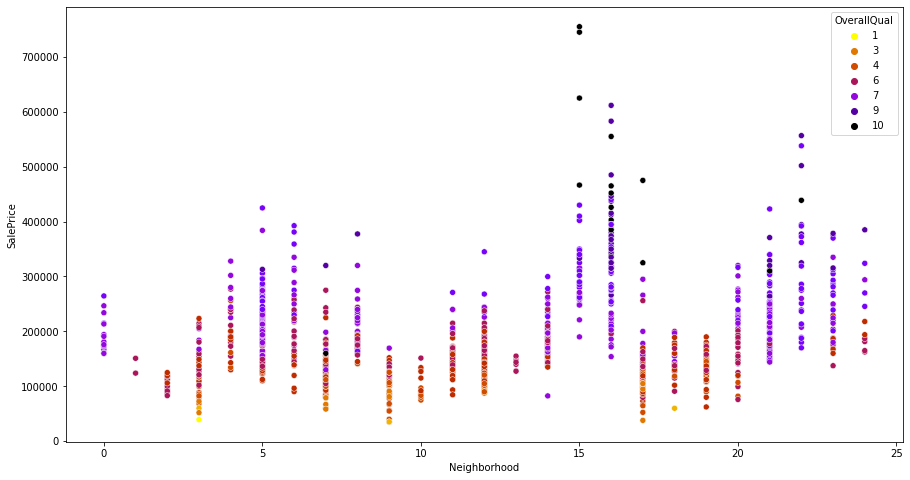

In [ ]:
# Neighborhood
plt.figure(figsize=(15,8))
sns.scatterplot(x=dfx['Neighborhood'], y = dfx['SalePrice'], hue = dfx.OverallQual, palette='gnuplot_r')

This Neighborhood data spread pattern is not formal

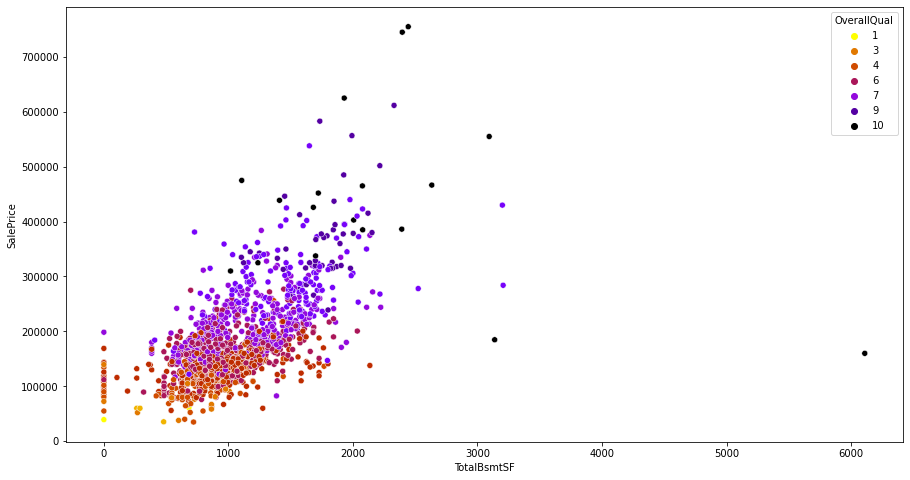

In [ ]:
# TotalBsmtSF
plt.figure(figsize=(15,8))
sns.scatterplot(x=dfx['TotalBsmtSF'], y = dfx['SalePrice'], hue = dfx.OverallQual, palette='gnuplot_r')

So we have found 3 most significant columns : OverallQual, GrLivArea,TotalBsmtSF

Checking Outliers

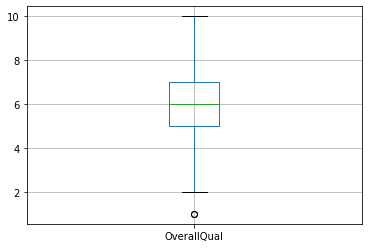

In [ ]:
df.boxplot(column = 'OverallQual')

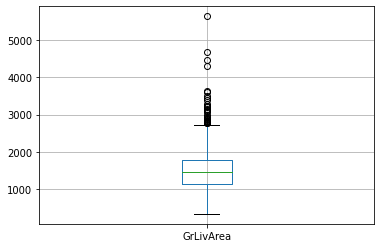

In [ ]:
df.boxplot(column = 'GrLivArea')

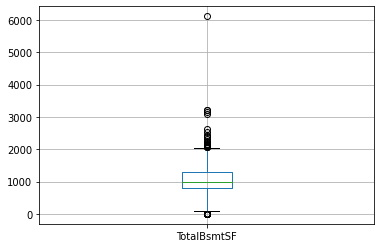

In [ ]:
df.boxplot(column = 'TotalBsmtSF')

### Handling outliers

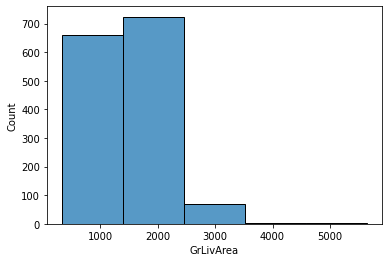

In [ ]:
sns.histplot(df, x = 'GrLivArea', bins = 5)

#### replacing all values greater than 3000 with 3000

In [ ]:
df['GrLivArea'].mask(df['GrLivArea']>2800, 2800, inplace = True)

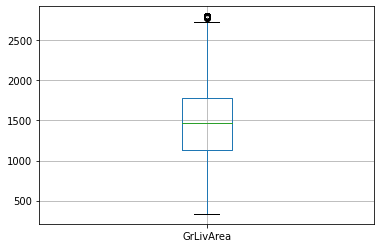

In [ ]:
# checking outliers now
df.boxplot(column = 'GrLivArea')

In [ ]:
df['TotalBsmtSF'].mask(df['TotalBsmtSF']>2200, 2200, inplace = True)

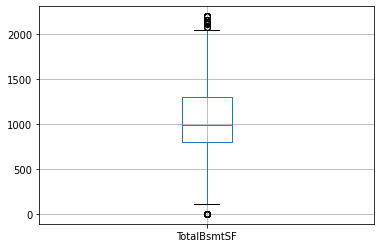

In [ ]:
# checking outliers now
df.boxplot(column = 'TotalBsmtSF')

## train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.33, random_state = 42)

# ALgorithm

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
lr  =  LinearRegression(n_jobs=-1)
lr.fit(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1']], ytrain)

LinearRegression(n_jobs=-1)

In [ ]:
ypred = lr.predict(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF', 'BsmtFinSF1']])
score = r2_score(ytrain, ypred)
score*100

72.41876200582315

### SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
vectAlgo = SVR(kernel='linear',degree=3,epsilon=500,tol=500,verbose=True)
vectAlgo.fit(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF']], ytrain)

[LibSVM]

SVR(epsilon=500, kernel='linear', tol=500, verbose=True)

In [ ]:
ypred = vectAlgo.predict(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF']])
score = r2_score(ytrain, ypred)
score*100

55.8839904062249

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {'bootstrap': [True,False],
 'criterion': ["squared_error", "absolute_error", "poisson"],
 'max_depth': np.arange(3,18),
 'min_samples_leaf': np.arange(1,15),
 'min_samples_split': np.arange(2,16),
 'n_estimators': [200,300,400,500,600],
 'n_jobs': [-1],
 'random_state': [42]
}

In [ ]:
search = RandomizedSearchCV(rf, params, n_iter=15, scoring='r2',cv=8, random_state=42)
search.fit(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1']], ytrain)

RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(random_state=42),
                   n_iter=15,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'n_estimators': [200, 300, 400, 500,
                                                         600],
                                        'n_jobs': [-1], 'random_state': [42]},
                   random_

In [ ]:
search.best_score_

0.7958098250628997

In [ ]:
search.best_params_

{'random_state': 42,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_samples_split': 9,
 'min_samples_leaf': 6,
 'max_depth': 9,
 'criterion': 'squared_error',
 'bootstrap': True}

In [ ]:
new_rf = search.best_estimator_
new_rf.fit(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1']], ytrain)

RandomForestRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=9,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
ypred = new_rf.predict(xtest[['OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1']])
score = r2_score(ytest, ypred)
score

0.8137651400471936

We are tuning parameters *manually* in contrast to **best_params_**

In [ ]:
new_rf = RandomForestRegressor(
    random_state= 42,
    n_jobs= -1,
    n_estimators= 500,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_depth= 9,
    criterion= 'absolute_error',
    bootstrap= True )
new_rf.fit(xtrain[['OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1']], ytrain)

RandomForestRegressor(criterion='absolute_error', max_depth=9, n_estimators=500,
                      n_jobs=-1, random_state=42)

In [ ]:
ypred = new_rf.predict(xtest[['OverallQual', 'GrLivArea','TotalBsmtSF','BsmtFinSF1']])
score = r2_score(ytest, ypred)
score*100

82.65024392473836

So randomforest is the most perfect algorithm here to predict house price